In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
#Download your api kaggle.jdon from kaggle and upload it here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lokadevm","key":"460dc02f59f07c98338841eab1442586"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
100% 663M/663M [00:31<00:00, 23.4MB/s]
100% 663M/663M [00:31<00:00, 21.8MB/s]


In [ ]:
#unziping the file
from zipfile import ZipFile
file_name = '/content/tuberculosis-tb-chest-xray-dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
! pip install split-folders


In [ ]:
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Function to load and preprocess images
def load_preprocess_images(data_dir, img_size=(512, 512)):
    images = []
    labels = []
    label_map = {}  # Map label names to integer IDs
    for label_id, label in enumerate(os.listdir(data_dir)):
        label_dir = os.path.join(data_dir, label)
        if not os.path.isdir(label_dir):  # Skip files that are not directories
            continue
        label_map[label] = label_id
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            # Read and resize image
            image = cv2.imread(image_path)
            image = cv2.resize(image, img_size)
            image = image.astype(np.float32) / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label_id)  # Use integer label ID
    return np.array(images), np.array(labels), label_map

# Load and preprocess data
data_dir = '/content/TB_Chest_Radiography_Database'
images, labels, label_map = load_preprocess_images(data_dir)

# Shuffle data
images, labels = shuffle(images, labels, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Batch and shuffle the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Print number of images in training and testing sets
print("Number of images in training set:", len(X_train))
print("Number of images in testing set:", len(X_test))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(processed_images, labels, test_size=0.2, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Convert to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle and batch the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Print the datasets
print("Train Dataset:")
print(train_dataset)

print("\nValidation Dataset:")
print(val_dataset)

print("\nTest Dataset:")
print(test_dataset)



FileNotFoundError: [Errno 2] No such file or directory: '/content/TB_Chest_Radiography_Database/Normal'

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(processed_images, labels, test_size=0.2, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Convert to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle and batch the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Count the number of samples in each dataset
train_count = train_dataset.cardinality().numpy()
val_count = val_dataset.cardinality().numpy()
test_count = test_dataset.cardinality().numpy()

# Print the number of samples in each dataset
print("Number of samples in the Train Dataset:", train_count)
print("Number of samples in the Validation Dataset:", val_count)
print("Number of samples in the Test Dataset:", test_count)


Number of samples in the Train Dataset: 105
Number of samples in the Validation Dataset: 14
Number of samples in the Test Dataset: 14


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train, validation, and test sets
train_images, test_val_images, train_labels, test_val_labels = train_test_split(processed_images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_val_images, test_val_labels, test_size=0.5, random_state=42)

# Convert to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle and batch the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Count the number of samples in each dataset
train_count = train_dataset.cardinality().numpy()
val_count = val_dataset.cardinality().numpy()
test_count = test_dataset.cardinality().numpy()

# Print the number of samples in each dataset
print("Number of samples in the Train Dataset:", train_count)
print("Number of samples in the Validation Dataset:", val_count)
print("Number of samples in the Test Dataset:", test_count)


Number of samples in the Train Dataset: 79
Number of samples in the Validation Dataset: 27
Number of samples in the Test Dataset: 27


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle and batch the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Count the number of samples in each dataset
train_count = len(train_images)
test_count = len(test_images)

# Print the number of samples in each dataset
print("Number of samples in the Train Dataset:", train_count)
print("Number of samples in the Test Dataset:", test_count)


Number of samples in the Train Dataset: 3360
Number of samples in the Test Dataset: 840


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle and batch the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Count the number of samples in each dataset
train_count = len(train_images)
test_count = len(test_images)

# Print the number of samples in each dataset
print("Number of samples in the Train Dataset:", train_count)
print("Number of samples in the Test Dataset:", test_count)

Number of samples in the Train Dataset: 3360
Number of samples in the Test Dataset: 840


In [ ]:
from tensorflow.keras import layers, models

# Define AlexNet model architecture
def AlexNet(input_shape, num_classes):
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Create the AlexNet model
model = AlexNet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)


Epoch 1/10
 69/105 [==================>...........] - ETA: 2:49 - loss: 1.2302 - accuracy: 0.8963

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define AlexNet model architecture
def create_AlexNet(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    optimizer = optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Define hyperparameters for tuning
learning_rates = [0.001, 0.0001]
dropout_rates = [0.5, 0.7]
epochs = 10
batch_size = 32

best_model = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        print(f"Training model with learning rate: {learning_rate}, dropout rate: {dropout_rate}")

        # Create the AlexNet model
        model = create_AlexNet(input_shape, num_classes, learning_rate, dropout_rate)

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(filepath='alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

        # Train the model
        history = model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                            validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])

        # Evaluate the model
        _, test_accuracy = model.evaluate(test_dataset)

        print(f"Test accuracy for current configuration: {test_accuracy}")

        # Check if current model is the best so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

print("Hyperparameter tuning completed.")
print(f"Best test accuracy: {best_accuracy}")

# Save the best model
best_model.save('best_alexnet_model.h5')


Training model with learning rate: 0.001, dropout rate: 0.5


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 1.0056 - accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 26s 213ms/step - loss: 1.0056 - accuracy: 0.9062 - val_loss: 0.4639 - val_accuracy: 0.8964
Epoch 2/10
105/105 [==============================] - 6s 52ms/step - loss: 0.1590 - accuracy: 0.9571 - val_loss: 0.5017 - val_accuracy: 0.8083
Epoch 3/10
105/105 [==============================] - 6s 54ms/step - loss: 0.1527 - accuracy: 0.9595 - val_loss: 1.7323 - val_accuracy: 0.4226
Epoch 4/10
27/27 [==============================] - 1s 23ms/step - loss: 0.4639 - accuracy: 0.8964


Test accuracy for current configuration: 0.8964285850524902
Training model with learning rate: 0.001, dropout rate: 0.7
Epoch 1/10
105/105 [==============================] - 29s 253ms/step - loss: 2.4742 - accuracy: 0.9021 - val_loss: 49.6978 - val_accuracy: 0.4726
Epoch 2/10
105/105 [==============================] - 21s 201ms/step - loss: 1.9270 - accuracy: 0.9268 - val_loss: 29.6842 - val_accuracy: 0.6012
Epoch 3/10
105/105 [==============================] - 26s 247ms/step - loss: 0.6714 - accuracy: 0.9426 - val_loss: 0.6761 - val_accuracy: 0.8702
Epoch 4/10
105/105 [==============================] - 26s 250ms/step - loss: 0.2661 - accuracy: 0.9580 - val_loss: 0.3095 - val_accuracy: 0.9310
Epoch 5/10
105/105 [==============================] - 22s 206ms/step - loss: 0.1403 - accuracy: 0.9655 - val_loss: 0.1522 - val_accuracy: 0.9488
Epoch 6/10
105/105 [==============================] - 6s 52ms/step - loss: 0.1685 - accuracy: 0.9673 - val_loss: 0.6784 - val_accuracy: 0.9095
Epoch 7/10

Epoch 1/10
105/105 [==============================] - 25s 203ms/step - loss: 0.9457 - accuracy: 0.9173 - val_loss: 4.7643 - val_accuracy: 0.6655
Epoch 2/10
105/105 [==============================] - 6s 52ms/step - loss: 0.1753 - accuracy: 0.9586 - val_loss: 8.5491 - val_accuracy: 0.1810
Epoch 3/10
105/105 [==============================] - 5s 52ms/step - loss: 0.1469 - accuracy: 0.9577 - val_loss: 7.2833 - val_accuracy: 0.1714
Epoch 4/10
27/27 [==============================] - 1s 19ms/step - loss: 4.7643 - accuracy: 0.6655
Test accuracy for current configuration: 0.6654762029647827
Training model with learning rate: 0.0001, dropout rate: 0.7


Epoch 1/10
105/105 [==============================] - 25s 214ms/step - loss: 2.1784 - accuracy: 0.9033 - val_loss: 20.3306 - val_accuracy: 0.4131
Epoch 2/10
105/105 [==============================] - 22s 208ms/step - loss: 0.8937 - accuracy: 0.9310 - val_loss: 3.5122 - val_accuracy: 0.6119
Epoch 3/10
105/105 [==============================] - 25s 239ms/step - loss: 0.3580 - accuracy: 0.9530 - val_loss: 0.4428 - val_accuracy: 0.8774
Epoch 4/10
105/105 [==============================] - 26s 249ms/step - loss: 0.1604 - accuracy: 0.9634 - val_loss: 0.1604 - val_accuracy: 0.9607
Epoch 5/10
105/105 [==============================] - 6s 53ms/step - loss: 0.1541 - accuracy: 0.9685 - val_loss: 3.4233 - val_accuracy: 0.5024
Epoch 6/10
105/105 [==============================] - 5s 52ms/step - loss: 0.1158 - accuracy: 0.9690 - val_loss: 0.2054 - val_accuracy: 0.9405
Epoch 7/10
105/105 [==============================] - 26s 250ms/step - loss: 0.0927 - accuracy: 0.9771 - val_loss: 0.0823 - val_accur

27/27 [==============================] - 1s 34ms/step
Accuracy: 0.9702380952380952
Precision: 0.9444444444444444
Recall: 0.8686131386861314
Sensitivity: 0.8686131386861314


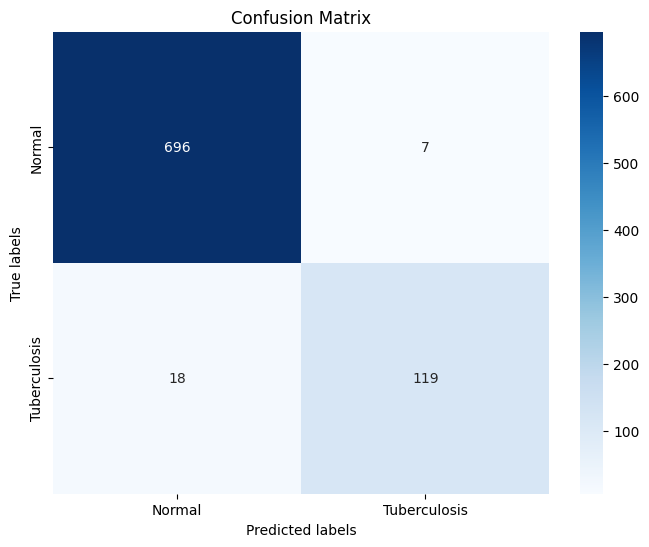

              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98       703
Tuberculosis       0.94      0.87      0.90       137

    accuracy                           0.97       840
   macro avg       0.96      0.93      0.94       840
weighted avg       0.97      0.97      0.97       840



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_alexnet_model.h5')

# Predict on the test dataset
y_pred = np.argmax(best_model.predict(test_dataset), axis=-1)

# Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate performance metrics
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
sensitivity = recall

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Sensitivity:", sensitivity)

# Generate a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_true, y_pred, target_names=["Normal", "Tuberculosis"]))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle and batch the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Define AlexNet model architecture
def create_AlexNet(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Define hyperparameters for tuning
learning_rates = [0.001, 0.0001]
dropout_rates = [0.5, 0.7]
epochs = 10
batch_size = 32
early_stopping_patience = 5  # Adjusted early stopping patience

best_model = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        print(f"Training model with learning rate: {learning_rate}, dropout rate: {dropout_rate}")

        # Create the AlexNet model
        model = create_AlexNet(input_shape, num_classes, learning_rate, dropout_rate)

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(filepath='alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

        # Train the model
        history = model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                            validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])

        # Evaluate the model
        _, test_accuracy = model.evaluate(test_dataset)

        print(f"Test accuracy for current configuration: {test_accuracy}")

        # Check if current model is the best so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

print("Hyperparameter tuning completed.")
print(f"Best test accuracy: {best_accuracy}")

# Save the best model
best_model.save('best_alexnet_model.h5')


Training model with learning rate: 0.001, dropout rate: 0.5
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.7947 - accuracy: 0.9107

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 19s 92ms/step - loss: 0.7947 - accuracy: 0.9107 - val_loss: 0.3688 - val_accuracy: 0.9131
Epoch 2/10
105/105 [==============================] - 5s 52ms/step - loss: 0.1309 - accuracy: 0.9643 - val_loss: 2.2914 - val_accuracy: 0.5464
Epoch 3/10
105/105 [==============================] - 12s 111ms/step - loss: 0.1285 - accuracy: 0.9664 - val_loss: 0.1364 - val_accuracy: 0.9560
Epoch 4/10
105/105 [==============================] - 5s 50ms/step - loss: 0.1425 - accuracy: 0.9640 - val_loss: 2.5146 - val_accuracy: 0.4810
Epoch 5/10
105/105 [==============================] - 5s 51ms/step - loss: 0.1007 - accuracy: 0.9711 - val_loss: 3.5373 - val_accuracy: 0.5238
Epoch 6/10
105/105 [==============================] - 5s 50ms/step - loss: 0.1009 - accuracy: 0.9708 - val_loss: 3.3547 - val_accuracy: 0.5762
Epoch 7/10
105/105 [==============================] - 6s 53ms/step - loss: 0.1649 - accuracy: 0.9661 - val_loss: 0.5161 - val_accuracy: 0.8571
Epoch 8

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize and normalize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to common size
    img = img.astype(np.float32) / 255.0  # Normalize pixel values
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dataset = datagen.flow(np.array(train_images), np.array(train_labels), batch_size=32)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

# Define AlexNet model architecture
def create_AlexNet(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential([
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Define hyperparameters for tuning
learning_rates = [0.001]
dropout_rates = [0.5]
epochs = 10
batch_size = 32

# Create the AlexNet model
model = create_AlexNet(input_shape, num_classes)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                    validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
_, test_accuracy = model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy}")

# Save the best model
model.save('best_alexnet_model.h5')


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.8046 - accuracy: 0.8940

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 653s 6s/step - loss: 0.8046 - accuracy: 0.8940 - val_loss: 0.6226 - val_accuracy: 0.7833
Epoch 2/10
105/105 [==============================] - 637s 6s/step - loss: 0.1854 - accuracy: 0.9384 - val_loss: 1.5393 - val_accuracy: 0.4893
Epoch 3/10
105/105 [==============================] - 631s 6s/step - loss: 0.2116 - accuracy: 0.9360 - val_loss: 0.2408 - val_accuracy: 0.8976
Epoch 4/10
105/105 [==============================] - 623s 6s/step - loss: 0.1786 - accuracy: 0.9354 - val_loss: 0.2851 - val_accuracy: 0.9095
Epoch 5/10
105/105 [==============================] - 620s 6s/step - loss: 0.1916 - accuracy: 0.9351 - val_loss: 0.6339 - val_accuracy: 0.7631
Epoch 6/10
27/27 [==============================] - 34s 1s/step - loss: 0.2408 - accuracy: 0.8976
Test accuracy: 0.8976190686225891


27/27 [==============================] - 34s 1s/step
Accuracy: 0.8976190476190476
Precision: 0.7865168539325843
Recall: 0.5109489051094891
Sensitivity: 0.5109489051094891


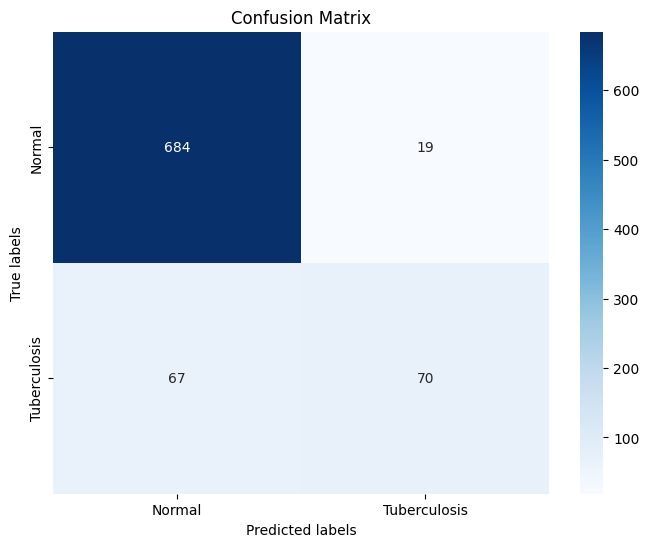

              precision    recall  f1-score   support

      Normal       0.91      0.97      0.94       703
Tuberculosis       0.79      0.51      0.62       137

    accuracy                           0.90       840
   macro avg       0.85      0.74      0.78       840
weighted avg       0.89      0.90      0.89       840



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_alexnet_model.h5')

# Predict on the test dataset
y_pred = np.argmax(best_model.predict(test_dataset), axis=-1)

# Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate performance metrics
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
sensitivity = recall

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Sensitivity:", sensitivity)

# Generate a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_true, y_pred, target_names=["Normal", "Tuberculosis"]))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
data_dir = '/content/TB_Chest_Radiography_Database'
normal_dir = os.path.join(data_dir, 'Normal')
tb_dir = os.path.join(data_dir, 'Tuberculosis')

# Load images and labels
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
tb_images = [os.path.join(tb_dir, img) for img in os.listdir(tb_dir)]
images = normal_images + tb_images
labels = [0] * len(normal_images) + [1] * len(tb_images)  # 0 for normal, 1 for tuberculosis

# Resize images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32) / 255.0
    return img

# Preprocess all images
processed_images = [preprocess_image(img) for img in images]

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train data augmentation generator
train_generator = train_datagen.flow(np.array(train_images), train_labels, batch_size=BATCH_SIZE)

# Test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Test data generator
test_generator = test_datagen.flow(np.array(test_images), test_labels, batch_size=BATCH_SIZE)

# Define AlexNet model architecture
def create_AlexNet(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    optimizer = optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Define hyperparameters for tuning
learning_rates = [0.001, 0.0001]
dropout_rates = [0.5, 0.7]
epochs = 10
batch_size = 32

best_model = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        print(f"Training model with learning rate: {learning_rate}, dropout rate: {dropout_rate}")

        # Create the AlexNet model
        model = create_AlexNet(input_shape, num_classes, learning_rate, dropout_rate)

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(filepath='alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

        # Train the model
        history = model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_images) // batch_size,
            epochs=epochs,
            validation_data=test_generator,
            validation_steps=len(test_images) // batch_size,
            callbacks=[early_stopping, model_checkpoint]
        )

        # Evaluate the model
        _, test_accuracy = model.evaluate(test_generator)

        print(f"Test accuracy for current configuration: {test_accuracy}")

        # Check if current model is the best so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

print("Hyperparameter tuning completed.")
print(f"Best test accuracy: {best_accuracy}")

# Save the best model
best_model.save('best_alexnet_model.h5')


NameError: name 'BATCH_SIZE' is not defined

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define AlexNet model architecture
def create_AlexNet(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    optimizer = optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Define hyperparameters for tuning
learning_rates = [0.001, 0.0001]
dropout_rates = [0.5, 0.7]
epochs = 10
batch_size = 32

best_model = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        print(f"Training model with learning rate: {learning_rate}, dropout rate: {dropout_rate}")

        # Create the AlexNet model
        model = create_AlexNet(input_shape, num_classes, learning_rate, dropout_rate)

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(filepath='alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

        # Train the model
        history = model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                            validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])

        # Evaluate the model
        _, test_accuracy = model.evaluate(test_dataset)

        print(f"Test accuracy for current configuration: {test_accuracy}")

        # Check if current model is the best so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

print("Hyperparameter tuning completed.")
print(f"Best test accuracy: {best_accuracy}")

# Save the best model
best_model.save('best_alexnet_model.h5')


Training model with learning rate: 0.001, dropout rate: 0.5


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 1.1815 - accuracy: 0.9143

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 511s 5s/step - loss: 1.1815 - accuracy: 0.9143 - val_loss: 0.9735 - val_accuracy: 0.8762
Epoch 2/10
105/105 [==============================] - 495s 5s/step - loss: 0.1689 - accuracy: 0.9628 - val_loss: 3.7249 - val_accuracy: 0.4071
Epoch 3/10
105/105 [==============================] - 509s 5s/step - loss: 0.1413 - accuracy: 0.9658 - val_loss: 0.5270 - val_accuracy: 0.8857
Epoch 4/10
105/105 [==============================] - 527s 5s/step - loss: 0.1136 - accuracy: 0.9673 - val_loss: 0.2581 - val_accuracy: 0.9548
Epoch 5/10
105/105 [==============================] - 531s 5s/step - loss: 0.0991 - accuracy: 0.9753 - val_loss: 0.1704 - val_accuracy: 0.9488
Epoch 6/10
105/105 [==============================] - 515s 5s/step - loss: 0.1118 - accuracy: 0.9690 - val_loss: 2.3221 - val_accuracy: 0.5202
Epoch 7/10
105/105 [==============================] - 497s 5s/step - loss: 0.1155 - accuracy: 0.9705 - val_loss: 3.2234 - val_accuracy: 0.5024
Epoch 8/10

Epoch 1/10
105/105 [==============================] - 515s 5s/step - loss: 2.6352 - accuracy: 0.8884 - val_loss: 2.4926 - val_accuracy: 0.8774
Epoch 2/10
105/105 [==============================] - 510s 5s/step - loss: 0.8444 - accuracy: 0.9390 - val_loss: 0.7665 - val_accuracy: 0.9131
Epoch 3/10
105/105 [==============================] - 487s 5s/step - loss: 0.3688 - accuracy: 0.9527 - val_loss: 3.1431 - val_accuracy: 0.6619
Epoch 4/10
105/105 [==============================] - 509s 5s/step - loss: 0.1848 - accuracy: 0.9670 - val_loss: 0.1393 - val_accuracy: 0.9643
Epoch 5/10
105/105 [==============================] - 495s 5s/step - loss: 0.1124 - accuracy: 0.9741 - val_loss: 0.2025 - val_accuracy: 0.9631
Epoch 6/10
105/105 [==============================] - 491s 5s/step - loss: 0.1329 - accuracy: 0.9702 - val_loss: 0.3295 - val_accuracy: 0.9476
Epoch 7/10
27/27 [==============================] - 28s 1s/step - loss: 0.1393 - accuracy: 0.9643
Test accuracy for current configuration: 0.9

Epoch 1/10
105/105 [==============================] - 525s 5s/step - loss: 0.6823 - accuracy: 0.9143 - val_loss: 0.7723 - val_accuracy: 0.7310
Epoch 2/10
105/105 [==============================] - 500s 5s/step - loss: 0.1718 - accuracy: 0.9524 - val_loss: 0.1194 - val_accuracy: 0.9631
Epoch 3/10
105/105 [==============================] - 494s 5s/step - loss: 0.1115 - accuracy: 0.9682 - val_loss: 1.2370 - val_accuracy: 0.8012
Epoch 4/10
105/105 [==============================] - 488s 5s/step - loss: 0.1836 - accuracy: 0.9494 - val_loss: 2.7382 - val_accuracy: 0.5381
Epoch 5/10
27/27 [==============================] - 28s 1s/step - loss: 0.1194 - accuracy: 0.9631
Test accuracy for current configuration: 0.9630952477455139
Training model with learning rate: 0.0001, dropout rate: 0.7


Epoch 1/10
105/105 [==============================] - 528s 5s/step - loss: 3.1072 - accuracy: 0.8842 - val_loss: 41.1425 - val_accuracy: 0.2881
Epoch 2/10
105/105 [==============================] - 520s 5s/step - loss: 0.7005 - accuracy: 0.9369 - val_loss: 0.3512 - val_accuracy: 0.9571
Epoch 3/10
105/105 [==============================] - 493s 5s/step - loss: 0.3048 - accuracy: 0.9595 - val_loss: 2.3487 - val_accuracy: 0.8464
Epoch 4/10
105/105 [==============================] - 488s 5s/step - loss: 0.2209 - accuracy: 0.9568 - val_loss: 0.6096 - val_accuracy: 0.8738
Epoch 5/10
27/27 [==============================] - 28s 1s/step - loss: 0.3512 - accuracy: 0.9571
Test accuracy for current configuration: 0.9571428298950195
Hyperparameter tuning completed.
Best test accuracy: 0.9642857313156128


27/27 [==============================] - 34s 1s/step
Accuracy: 0.9642857142857143
Precision: 0.9212598425196851
Recall: 0.8540145985401459
Sensitivity: 0.8540145985401459


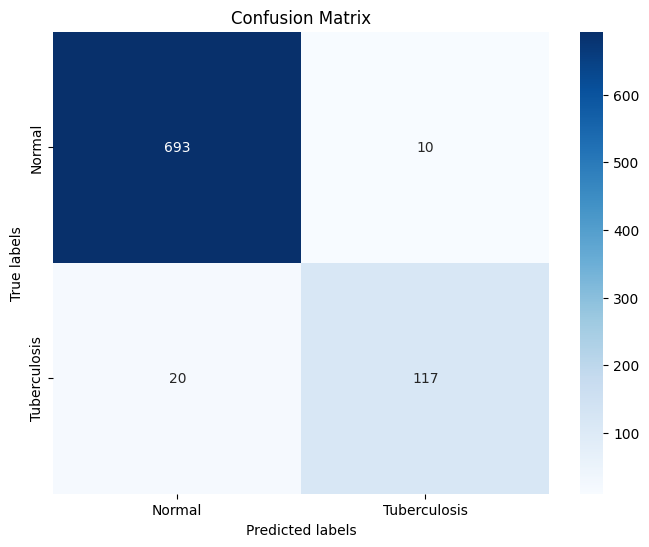

              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98       703
Tuberculosis       0.92      0.85      0.89       137

    accuracy                           0.96       840
   macro avg       0.95      0.92      0.93       840
weighted avg       0.96      0.96      0.96       840



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_alexnet_model.h5')

# Predict on the test dataset
y_pred = np.argmax(best_model.predict(test_dataset), axis=-1)

# Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate performance metrics
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
sensitivity = recall

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Sensitivity:", sensitivity)

# Generate a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_true, y_pred, target_names=["Normal", "Tuberculosis"]))


In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define AlexNet model architecture
def create_AlexNet(input_shape, num_classes, learning_rate=0.001, dropout_rate=0.5):
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    optimizer = optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2  # 2 classes: Normal and Tuberculosis

# Define hyperparameters for tuning
learning_rates = [0.001, 0.0001]
dropout_rates = [0.5, 0.7]
epochs = 10
batch_size = 32

best_model = None
best_accuracy = 0.0

# Perform hyperparameter tuning
for learning_rate in learning_rates:
    for dropout_rate in dropout_rates:
        print(f"Training model with learning rate: {learning_rate}, dropout rate: {dropout_rate}")

        # Create the AlexNet model
        model = create_AlexNet(input_shape, num_classes, learning_rate, dropout_rate)

        # Define callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(filepath='alexnet_best_model.h5', monitor='val_loss', save_best_only=True)

        # Train the model
        history = model.fit(train_dataset, epochs=epochs, batch_size=batch_size,
                            validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])

        # Evaluate the model
        _, test_accuracy = model.evaluate(test_dataset)

        print(f"Test accuracy for current configuration: {test_accuracy}")

        # Check if current model is the best so far
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

print("Hyperparameter tuning completed.")
print(f"Best test accuracy: {best_accuracy}")

# Save the best model
best_model.save('best_alexnet_model.h5')


Training model with learning rate: 0.001, dropout rate: 0.5


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.7983 - accuracy: 0.9051

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 528s 5s/step - loss: 0.7983 - accuracy: 0.9051 - val_loss: 0.7051 - val_accuracy: 0.8774
Epoch 2/10
105/105 [==============================] - 499s 5s/step - loss: 0.1659 - accuracy: 0.9592 - val_loss: 4.5466 - val_accuracy: 0.4988
Epoch 3/10
105/105 [==============================] - 500s 5s/step - loss: 0.1311 - accuracy: 0.9598 - val_loss: 0.2232 - val_accuracy: 0.9036
Epoch 4/10
105/105 [==============================] - 506s 5s/step - loss: 0.1470 - accuracy: 0.9542 - val_loss: 0.3245 - val_accuracy: 0.8976
Epoch 5/10
105/105 [==============================] - 512s 5s/step - loss: 0.1641 - accuracy: 0.9643 - val_loss: 16.8783 - val_accuracy: 0.2786
Epoch 6/10
27/27 [==============================] - 84s 3s/step - loss: 0.2232 - accuracy: 0.9036
Test accuracy for current configuration: 0.9035714268684387
Training model with learning rate: 0.001, dropout rate: 0.7


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 2.2987 - accuracy: 0.9009

27/27 [==============================] - 1s 20ms/step
Accuracy: 0.955952380952381
Precision: 0.9310344827586207
Recall: 0.7883211678832117
Sensitivity: 0.7883211678832117


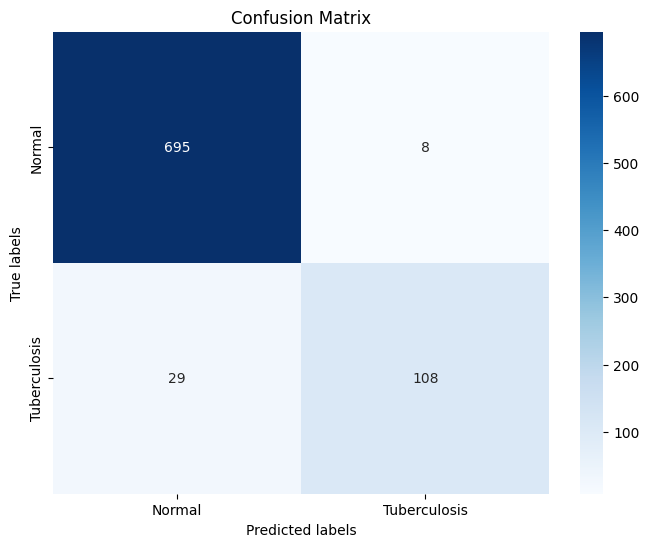

              precision    recall  f1-score   support

      Normal       0.96      0.99      0.97       703
Tuberculosis       0.93      0.79      0.85       137

    accuracy                           0.96       840
   macro avg       0.95      0.89      0.91       840
weighted avg       0.96      0.96      0.95       840



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_alexnet_model.h5')

# Predict on the test dataset
y_pred = np.argmax(best_model.predict(test_dataset), axis=-1)

# Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate performance metrics
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
sensitivity = recall

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Sensitivity:", sensitivity)

# Generate a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_true, y_pred, target_names=["Normal", "Tuberculosis"]))
